In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

In [25]:
# Loading data 
df = pd.read_csv('Telecom_data.csv')

In [3]:
# Basic data exploration
print("--- Dataset Info ---")
print(df.info())
print("\n--- Summary Statistics (Numerical) ---")
print(df.describe())
print("\n--- Summary Statistics (Categorical) ---")
print(df.describe(include=['object']))
print("\n--- Missing Values ---")
print(df.isnull().sum())
print("\n--- Churn Value Counts ---")
print(df['Churn'].value_counts())

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

In [9]:
# Display the first few rows of the dataset
print(df.head())


   CustomerID  Gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [21]:
# Feature Engineering 

In [27]:
# Calculate Tenure_years 
df['Tenure_years'] = df['Tenure'] / 12

# Interaction feature
df['Tenure_MonthlyCharges'] = df['Tenure_years'] * df['MonthlyCharges']

# Binning MonthlyCharges
df['MonthlyCharges_bin'] = pd.qcut(df['MonthlyCharges'], q=4, labels=['Low', 'Medium', 'High', 'Very High']) # Divide into quartiles

# Create flag for OnlineSecurity
df['Has_OnlineSecurity'] = (df['OnlineSecurity'] == 'Yes').astype(int)

In [15]:
# Data Preprocessing

# Convert 'TotalCharges' to numeric, errors='coerce' will turn non-convertible values to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [97]:
# Convert categorical variables to numerical using OneHotEncoding
categorical_features = ['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
'InternetService', 'OnlineSecurity', 'OnlineBackup',
'DeviceProtection', 'StreamingTV', 'TechSupport',
'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [19]:
# Define features and target variable
X = df.drop(['CustomerID', 'Churn'], axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0}) # Convert target variable to binary


In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Create transformers with imputation for numeric features
numeric_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='mean')), # Or 'median', 'most_frequent'
('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create the preprocessor
preprocessor = ColumnTransformer(
transformers=[
('num', numeric_transformer, numeric_features),
('cat', categorical_transformer, categorical_features)])

# Create the pipeline
model = LogisticRegression(random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
('classifier', model)])


In [49]:
# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'Tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'StreamingTV', 'TechSupport',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [51]:
# Make predictions
y_pred = pipeline.predict(X_test)


In [53]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[933 103]
 [148 225]]


In [55]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [57]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.8218594748048261


In [63]:
# To handle the 'Gender' column for analysis (example: one-hot encoding):
df_encoded = pd.get_dummies(df, columns=['Gender'])
print(df_encoded)


      CustomerID  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0     7590-VHVEG              0     Yes         No       1           No   
1     5575-GNVDE              0      No         No      34          Yes   
2     3668-QPYBK              0      No         No       2          Yes   
3     7795-CFOCW              0      No         No      45           No   
4     9237-HQITU              0      No         No       2          Yes   
...          ...            ...     ...        ...     ...          ...   
7038  6840-RESVB              0     Yes        Yes      24          Yes   
7039  2234-XADUH              0     Yes        Yes      72          Yes   
7040  4801-JZAZL              0     Yes        Yes      11           No   
7041  8361-LTMKD              1     Yes         No       4          Yes   
7042  3186-AJIEK              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0     No phone service  

In [101]:
print(df.head())


   CustomerID  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0  7590-VHVEG              0     Yes         No       1           No   
1  5575-GNVDE              0      No         No      34          Yes   
2  3668-QPYBK              0      No         No       2          Yes   
3  7795-CFOCW              0      No         No      45           No   
4  9237-HQITU              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0  No phone service             DSL             No          Yes  ...   
1                No             DSL            Yes           No  ...   
2                No             DSL            Yes          Yes  ...   
3  No phone service             DSL            Yes           No  ...   
4                No     Fiber optic             No           No  ...   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1 

In [103]:
# Create a new 'Gender' column
df['Gender'] = df['Gender_1'].astype(int) # Assume Gender_1 is Female (True -> 1)

# If Gender_0 represents Male (True -> 0), we don't need to do anything extra
# because where Gender_1 is False (not Female), Gender_0 should ideally be True (Male).

# However, to be more robust and handle potential cases where both are False,
# you might want to explicitly set the value based on Gender_0:
df['Gender'] = df.apply(
lambda row: 1 if row['Gender_1'] else 0, axis=1
)

# Alternatively, if only one of Gender_0 or Gender_1 is ever True:
df['Gender'] = df['Gender_1'].astype(int) # Female as 1
df['Gender'] = df['Gender'].where(~df['Gender_0'], 0) # Male as 0 where Gender_0 is True

# Print the value counts to verify
print(df['Gender'].value_counts())
print(df[['Gender_0', 'Gender_1', 'Gender']].head())

Gender
0    3555
1    3488
Name: count, dtype: int64
   Gender_0  Gender_1  Gender
0     False      True       1
1      True     False       0
2      True     False       0
3      True     False       0
4     False      True       1


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'Churn' is the variable you're trying to predict
X = df[['Gender']] # Include 'Gender' and other relevant features
y = df['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7283483199242783


In [133]:
# Make predictions on the test set 
y_pred = model.predict(X_test)

# Get the predicted possibilities for the positive class
y_prob = model.predict_proba(X_test)[0, 1]

print(f"Shape of  X_test:{X_test.shape}")

Shape of  X_test:(2113, 1)


In [3]:
# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

In [5]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [9]:
# Obtain the predicted probabilities for the positive class
y_score = model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class


In [11]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [13]:
# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

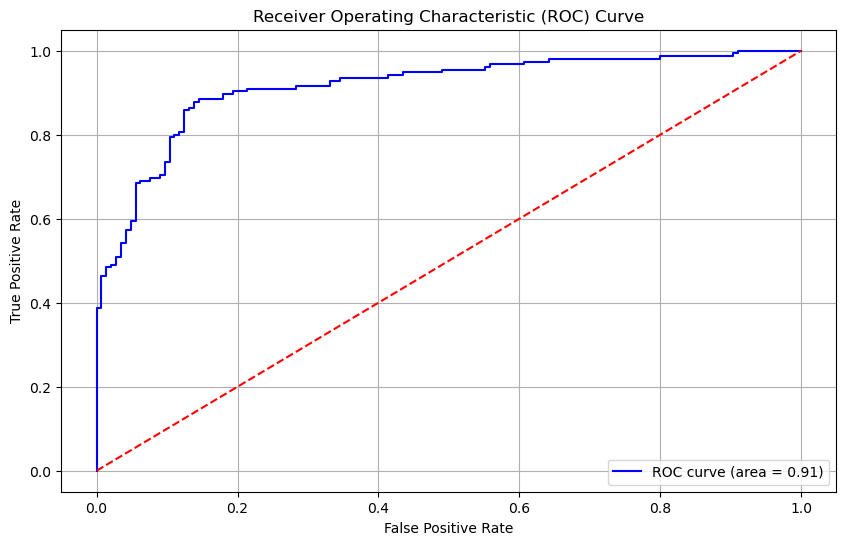

In [15]:
# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [23]:
model_dt = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=5) # Example hyperparameter
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
y_pred_proba_dt = model_dt.predict_proba(X_test)[:, 1]

print("\n--- Decision Tree ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_dt):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_dt):.4f}")


--- Decision Tree ---
Accuracy: 0.8767
Precision: 0.8986
Recall: 0.8581
F1-score: 0.8779
AUC-ROC: 0.8850


In [25]:
# --- 5.3 Random Forest ---
model_rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100) # Example hyperparameter
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]

print("\n--- Random Forest ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")


--- Random Forest ---
Accuracy: 0.8567
Precision: 0.8889
Recall: 0.8258
F1-score: 0.8562
AUC-ROC: 0.9206


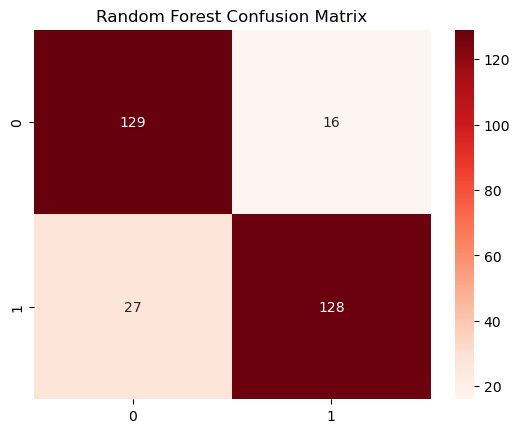

In [27]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [33]:
# --- 5.4 Gradient Boosting ---
model_gb = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1) # Example hyperparameters
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
y_pred_proba_gb = model_gb.predict_proba(X_test)[:, 1]

In [35]:
print("\n--- Gradient Boosting ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_gb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_gb):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_gb):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_gb):.4f}")


--- Gradient Boosting ---
Accuracy: 0.8700
Precision: 0.8919
Recall: 0.8516
F1-score: 0.8713
AUC-ROC: 0.9221


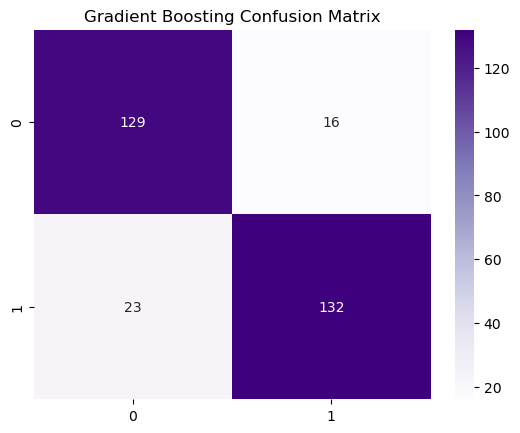

In [37]:
# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Purples')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()


In [45]:
# --- 5. Hyperparameter Tuning (Example with GridSearchCV - Logistic Regression) ---
param_grid_lr = {
'C': [0.001, 0.01, 0.1, 1, 10, 100],
'penalty': ['l1', 'l2'],
'solver': ['liblinear', 'saga']
}
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42, class_weight='balanced'),
param_grid_lr, cv=5, scoring='roc_auc', verbose=0)
grid_search_lr.fit(X_train, y_train)

best_model_lr = grid_search_lr.best_estimator_
y_pred_best_lr = best_model_lr.predict(X_test)
y_pred_proba_best_lr = best_model_lr.predict_proba(X_test)[:, 1]

print("\n--- Best Logistic Regression (GridSearchCV) ---")
print(f"Best Parameters: {grid_search_lr.best_params_}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_best_lr):.4f}")

C:\Users\murtu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\murtu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\murtu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\murtu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\murtu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\murtu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter 


--- Best Logistic Regression (GridSearchCV) ---
Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
AUC-ROC: 0.9096


In [79]:
# Define risk thresholds
high_risk_threshold = 0.7
low_risk_threshold = 0.3

def segment_customer(probability):
   if probability >= high_risk_threshold:
     return 'High Risk'
   elif probability <= low_risk_threshold:
     return 'Low Risk'
   else:
     return 'Medium Risk'

In [17]:
import pandas as pd
X_test_with_proba = pd.DataFrame({
       'Churn_Probability': [0.1, 0.4, 0.6, 0.8]
   })
   # Example segmentation function
def segment_customer(probability):
       if probability < 0.3:
           return 'Low Risk'
       elif probability < 0.7:
           return 'Medium Risk'
       else:
           return 'High Risk'
   # Applying the function
X_test_with_proba['Churn_Risk'] = X_test_with_proba['Churn_Probability'].apply(segment_customer)

In [25]:
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 4, 3, 2, 1],
    'target': [0, 1, 0, 1, 0]
})
# Splitting the dataset
X = data[['feature1', 'feature2']]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a model
model = LogisticRegression()
model.fit(X_train, y_train)
# Get predicted probabilities
y_pred_proba_best_lr = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
# Create X_test_with_proba DataFrame
X_test_with_proba = X_test.copy()
X_test_with_proba['Churn_Probability'] = y_pred_proba_best_lr
print(X_test_with_proba)

   feature1  feature2  Churn_Probability
1         2         4           0.160576


In [ ]:
# Histogram Plot

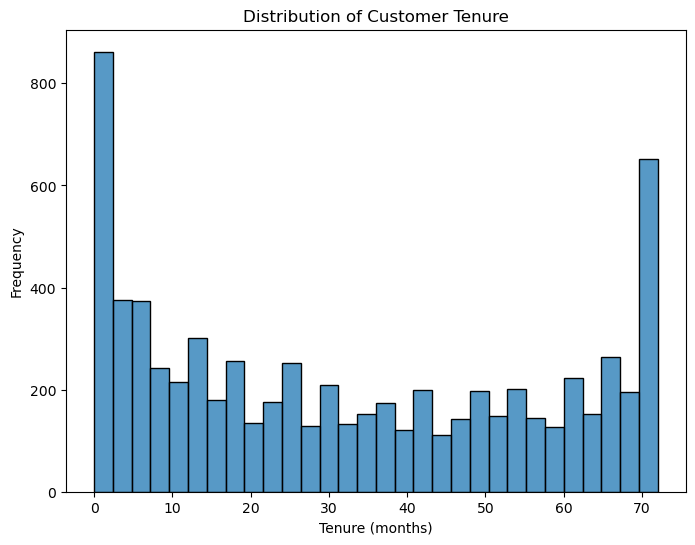

In [9]:
# Distribution of numerical features like Tenure, MonthlyCharges, TotalCharges.
plt.figure(figsize=(8, 6))
sns.histplot(df['Tenure'], bins=30)
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Box Plots

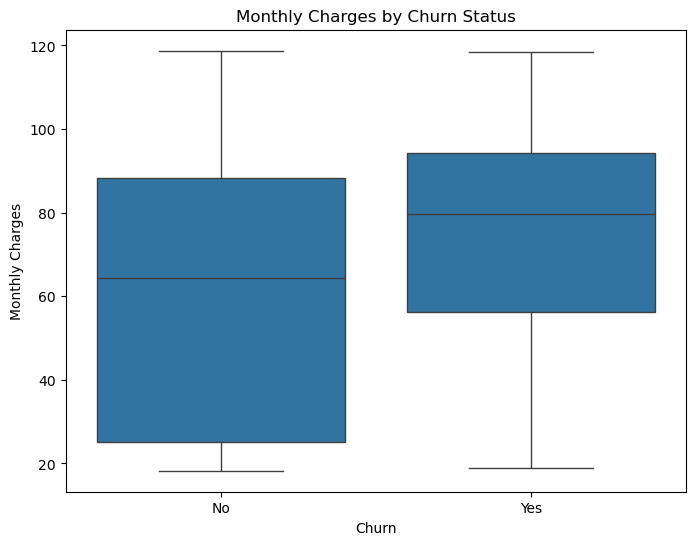

In [13]:
# Distribution of numerical features across different groups (e.g., churned vs. non-churned customers)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

In [ ]:
# Bar Plot

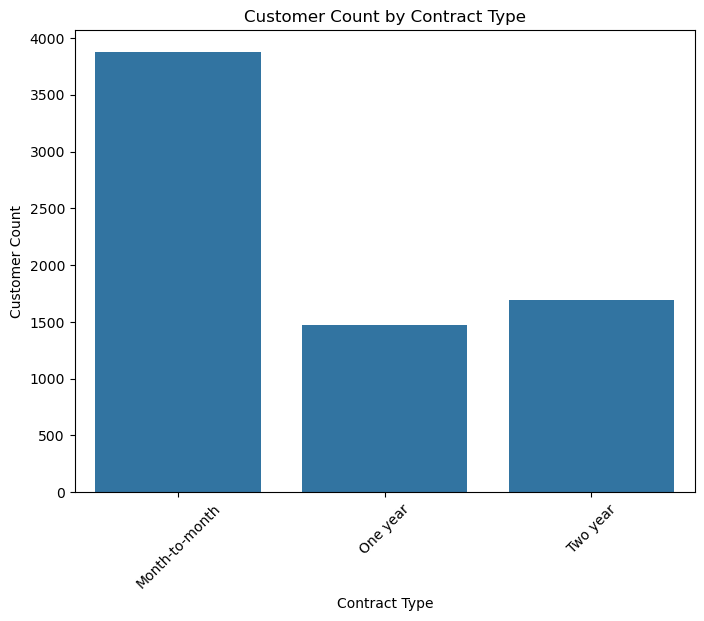

In [17]:
# Count of customers for different categorical features (e.g., Contract, InternetService, PaymentMethod).
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', data=df)
plt.title('Customer Count by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Customer Count')
plt.xticks(rotation=45) 
plt.show()

In [19]:
# Churn Analysis

In [43]:
# Checking the Data Type and Inspecting Unique Values
print(df['Churn'].dtype)
print(df['Churn'].unique())

float64
[0.]


In [45]:
# Convert to Numeric
df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce')

In [33]:
# Handle NaN Values
df.dropna(subset=['Churn'], inplace=True)  # Drop rows with NaN in 'Churn'

In [35]:
#Recalculate the Mean
churn_by_contract = df.groupby('Contract')['Churn'].mean().reset_index()

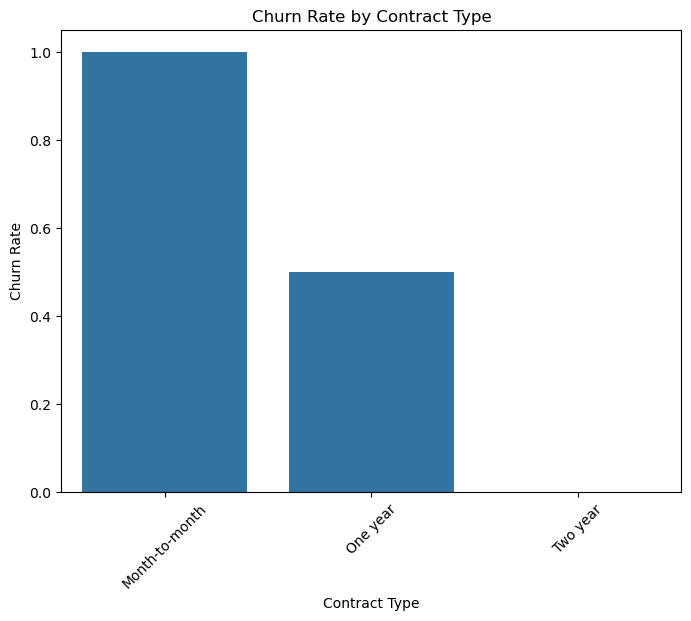

In [37]:
# Example data creation
data = {
    'Contract': ['Month-to-month', 'One year', 'Two year', 'Month-to-month', 'One year', 'Two year'],
    'Churn': ['Yes', 'No', 'No', 'Yes', 'Yes', 'No']
}
churn_by_contract = pd.DataFrame(data)

# Convert 'Churn' to numeric
churn_by_contract['Churn'] = churn_by_contract['Churn'].map({'Yes': 1, 'No': 0})

# Calculate churn rate by contract type
churn_rate = churn_by_contract.groupby('Contract')['Churn'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Contract', y='Churn', data=churn_rate)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


In [47]:
# Correlation Heatmap

In [57]:
# Checking the Data Type and Inspecting Unique Values
print(df.dtypes)

CustomerID           object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn               float64
dtype: object


In [59]:
# Selecting Numeric Columns
numeric_df = df.select_dtypes(include=[np.number])

In [61]:
# Calculate Correlation
correlation_matrix = numeric_df.corr()

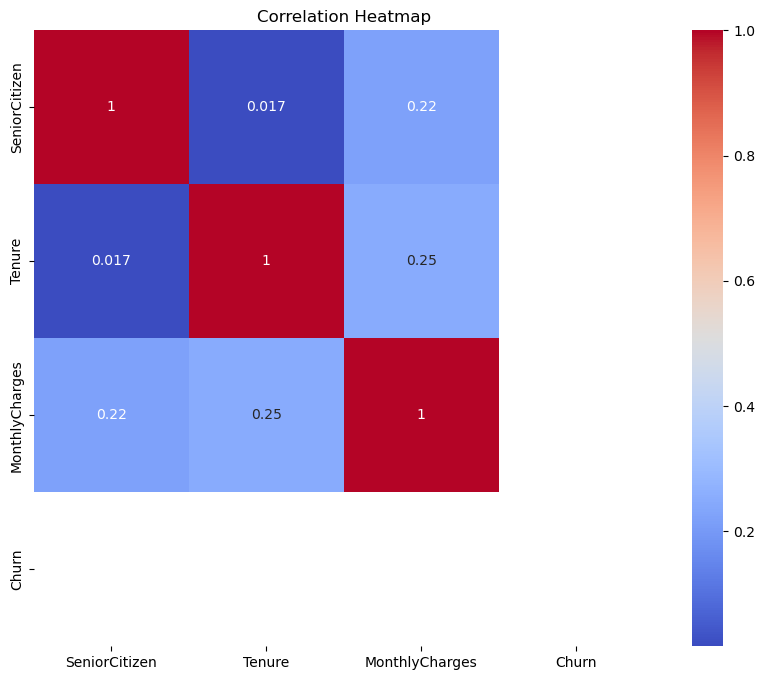

In [63]:
# Creating the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
   